## Relax Take Home Challenge

An "adopted user" as a user who has logged into the product on three separate days in at least one seven day period.

The first step is to identify which users classify as an 'adopted user' and creating an adopted_user column that specifies 0 for no and 1 for yes.


#### 1. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import datetime

#### 2. CSV imports and Initial Exploration

In [2]:
path = os.getcwd()
path = path.replace('Notebook','')

In [3]:
takehome_engagement = pd.read_csv(path+'\\takehome_user_engagement.csv')
takehome_users = pd.read_csv(path+'\\takehome_users.csv')

In [4]:
takehome_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
takehome_engagement['time_stamp'] = pd.to_datetime(takehome_engagement['time_stamp'])

In [6]:
takehome_engagement['year'] = takehome_engagement['time_stamp'].dt.date

In [7]:
takehome_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


#### 3. Checking for Adopted Users

In [8]:
value_counts = takehome_engagement['user_id'].value_counts().reset_index()
value_counts.columns = ['user_id', 'count']

In [9]:
value_counts

,user_id,count
0,3623,606
1,906,600
2,1811,593
3,7590,590
4,8068,585
...,...,...
8818,3267,1
8819,1218,1
8820,7361,1
8821,11335,1


In [10]:
takehome_engagement.head()

,time_stamp,user_id,visited,year
0,2014-04-22 03:53:30,1,1,2014-04-22
1,2013-11-15 03:45:04,2,1,2013-11-15
2,2013-11-29 03:45:04,2,1,2013-11-29
3,2013-12-09 03:45:04,2,1,2013-12-09
4,2013-12-25 03:45:04,2,1,2013-12-25


In [11]:
def three_day(df_user_id):
    '''
    Calculates if there was 3 log ins in a 7 day period.
    
    Uses a for loop to iterate through a list of log in dates sorted by the date. The currently selected date is subtracted
    from the date that is 2 dates later. If the difference is less than 7 days, then return 1 for a adopted user, otherwise
    return 0 for a not adopted user.
    
    For example:
                time_stamp   	user_id  	visited 	year
    	2013-02-19 09:15:48 	3638 	  1     	2013-02-19
    	2013-02-20 09:15:48 	3638 	  1     	2013-02-20
    	2013-02-25 09:15:48 	3638 	  1     	2013-02-25
        
    the first time stamp is subtracted from the timestamp 2 ahead (2013-02-25 minus 2013-02-19 == 6 days),
    therefore returns 1
    '''
    df_slice = takehome_engagement[takehome_engagement['user_id']==df_user_id]
    count = 0
    date_list = list(df_slice['year'])
    for x in range(len(date_list)):
        if x+2<len(date_list): # Checks to make sure that there are at least 3 days in the list of dates
            if date_list[x+2]-date_list[x] <= datetime.timedelta(days=7): 
                return 1
    return 0

In [12]:
list1 = []
list2 = []
for index in range(len(value_counts)):
    user_id = value_counts.iloc[index]
    list1.append(user_id['user_id'])
    list2.append(three_day(user_id['user_id']))            
adopted_user_df = pd.DataFrame({'user_id':list1, 'adopted_user':list2})
print('Done')
    

Done


In [13]:
adopted_user_df['adopted_user'].value_counts()

0    7167
1    1656
Name: adopted_user, dtype: int64

In [14]:
adopted_user_df[adopted_user_df['adopted_user']==1]

,user_id,adopted_user
0,3623,1
1,906,1
2,1811,1
3,7590,1
4,8068,1
...,...,...
2117,3059,1
2157,5528,1
2179,3638,1
2195,4093,1


In [26]:
takehome_engagement = pd.merge(takehome_engagement, adopted_user_df, left_on='user_id', right_on='user_id')

In [50]:
takehome_engagement['hour'] = takehome_engagement['time_stamp'].dt.hour

In [51]:
takehome_engagement['month'] = takehome_engagement['time_stamp'].dt.month

In [31]:
takehome_engagement.head()

,time_stamp,user_id,visited,year,adopted_user,hour
0,2014-04-22 03:53:30,1,1,2014-04-22,0,3
1,2013-11-15 03:45:04,2,1,2013-11-15,1,3
2,2013-11-29 03:45:04,2,1,2013-11-29,1,3
3,2013-12-09 03:45:04,2,1,2013-12-09,1,3
4,2013-12-25 03:45:04,2,1,2013-12-25,1,3


#### 4. Merge DataFrames

In [16]:
merged_engagement = pd.merge(takehome_users, adopted_user_df, left_on='object_id', right_on='user_id')

In [17]:
merged_engagement.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,3,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,4,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,5,0


In [18]:
merged_engagement.drop('user_id', axis=1, inplace=True)
merged_engagement.rename(columns ={'object_id':'user_id'}, inplace=True)


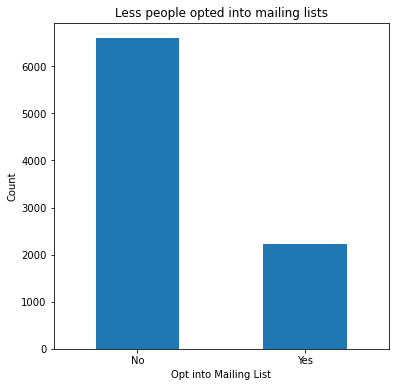

In [19]:
plt.subplots(figsize=(6,6))
plt.title('Less people opted into mailing lists')
plt.xlabel('Opt into Mailing List')
plt.ylabel('Count')
ax = merged_engagement['opted_in_to_mailing_list'].value_counts().plot(kind='bar')
ax.set_xticklabels(labels=['No', 'Yes'], rotation=0)
plt.show()

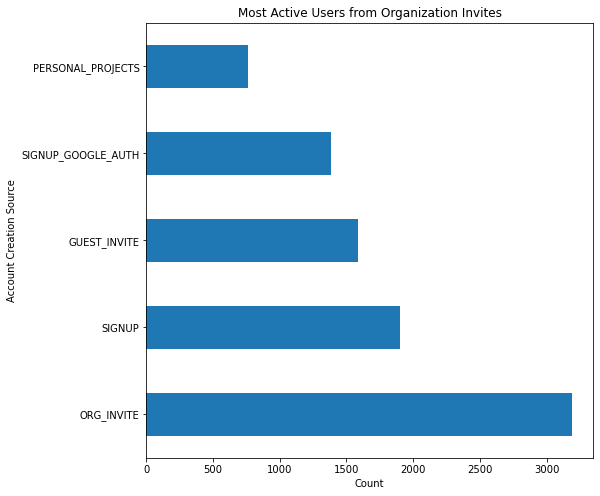

In [20]:
plt.subplots(figsize=(8,8))
plt.title('Most Active Users from Organization Invites')
plt.ylabel('Account Creation Source')
plt.xlabel('Count')
ax = merged_engagement['creation_source'].value_counts().plot(kind='barh')
plt.show()

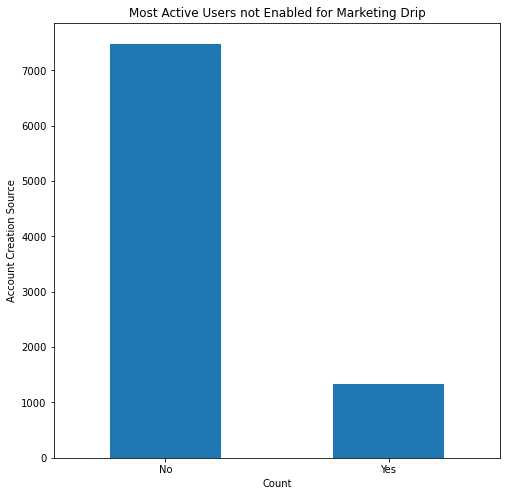

In [21]:
plt.subplots(figsize=(8,8))
plt.title('Most Active Users not Enabled for Marketing Drip')
plt.ylabel('Account Creation Source')
plt.xlabel('Count')
ax = merged_engagement['enabled_for_marketing_drip'].value_counts().plot(kind='bar')
ax.set_xticklabels(labels=['No', 'Yes'], rotation=0)
plt.show()

In [22]:
merged_engagement['org_id'].max()

416

In [23]:
merged_engagement['invited_by_user_id'].value_counts().sort_values(ascending=False).head()


4612.0     10
2308.0      9
11770.0     9
2527.0      8
10741.0     8
Name: invited_by_user_id, dtype: int64

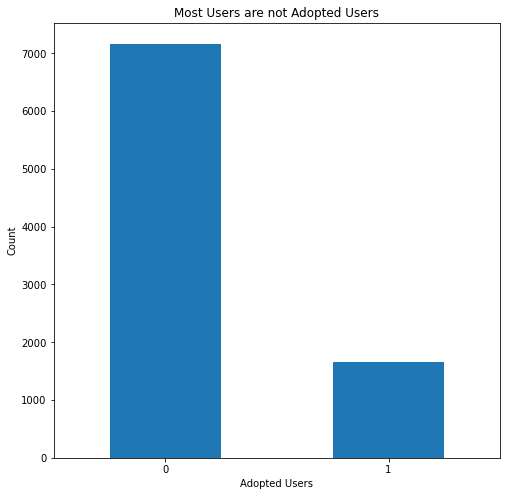

In [24]:
plt.subplots(figsize=(8,8))
plt.title('Most Users are not Adopted Users')
plt.xlabel('Adopted Users')
plt.ylabel('Count')
ax = merged_engagement['adopted_user'].value_counts().head().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

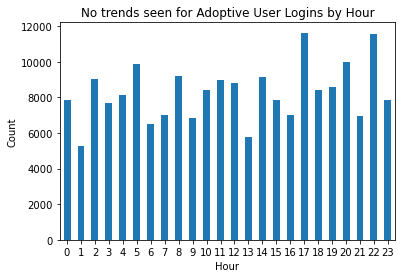

In [52]:
takehome_engagement[takehome_engagement['adopted_user']==1]['hour'].value_counts().sort_index().plot(kind='bar')
plt.title('No trends seen for Adoptive User Logins by Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

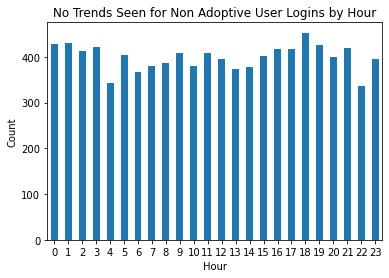

In [54]:
takehome_engagement[takehome_engagement['adopted_user']==0]['hour'].value_counts().sort_index().plot(kind='bar')
plt.title('No Trends Seen for Non Adoptive User Logins by Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

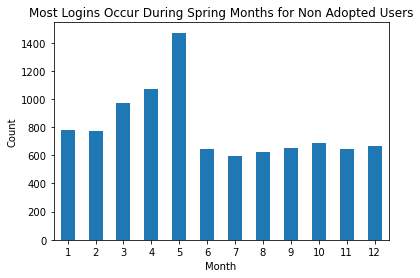

In [59]:
takehome_engagement[takehome_engagement['adopted_user']==0]['month'].value_counts().sort_index().plot(kind='bar')
plt.title('Most Logins Occur During Spring Months for Non Adopted Users')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

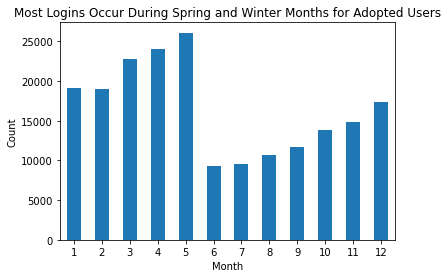

In [60]:
takehome_engagement[takehome_engagement['adopted_user']==1]['month'].value_counts().sort_index().plot(kind='bar')
plt.title('Most Logins Occur During Spring and Winter Months for Adopted Users')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

A higher percentage of adopted users are logging in during winter and spring months than non adopted users.

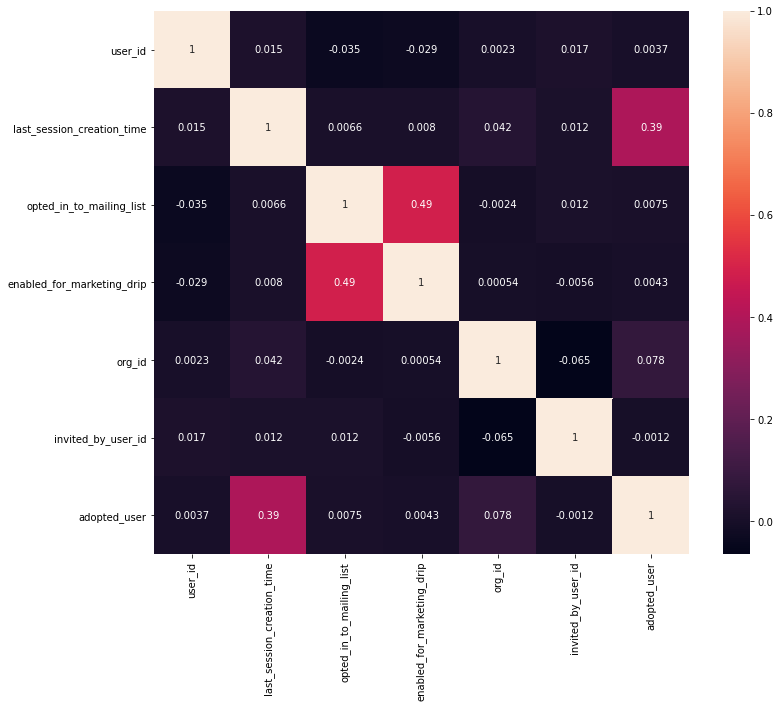

In [61]:
df_heatmap = merged_engagement.corr()

plt.subplots(figsize=(12,10))
sns.heatmap(df_heatmap,annot=True)
plt.show()

The heatmap above shows that the **most useful feature towards our metric of being an 'adoptive user' is the last_session_creation_time.**

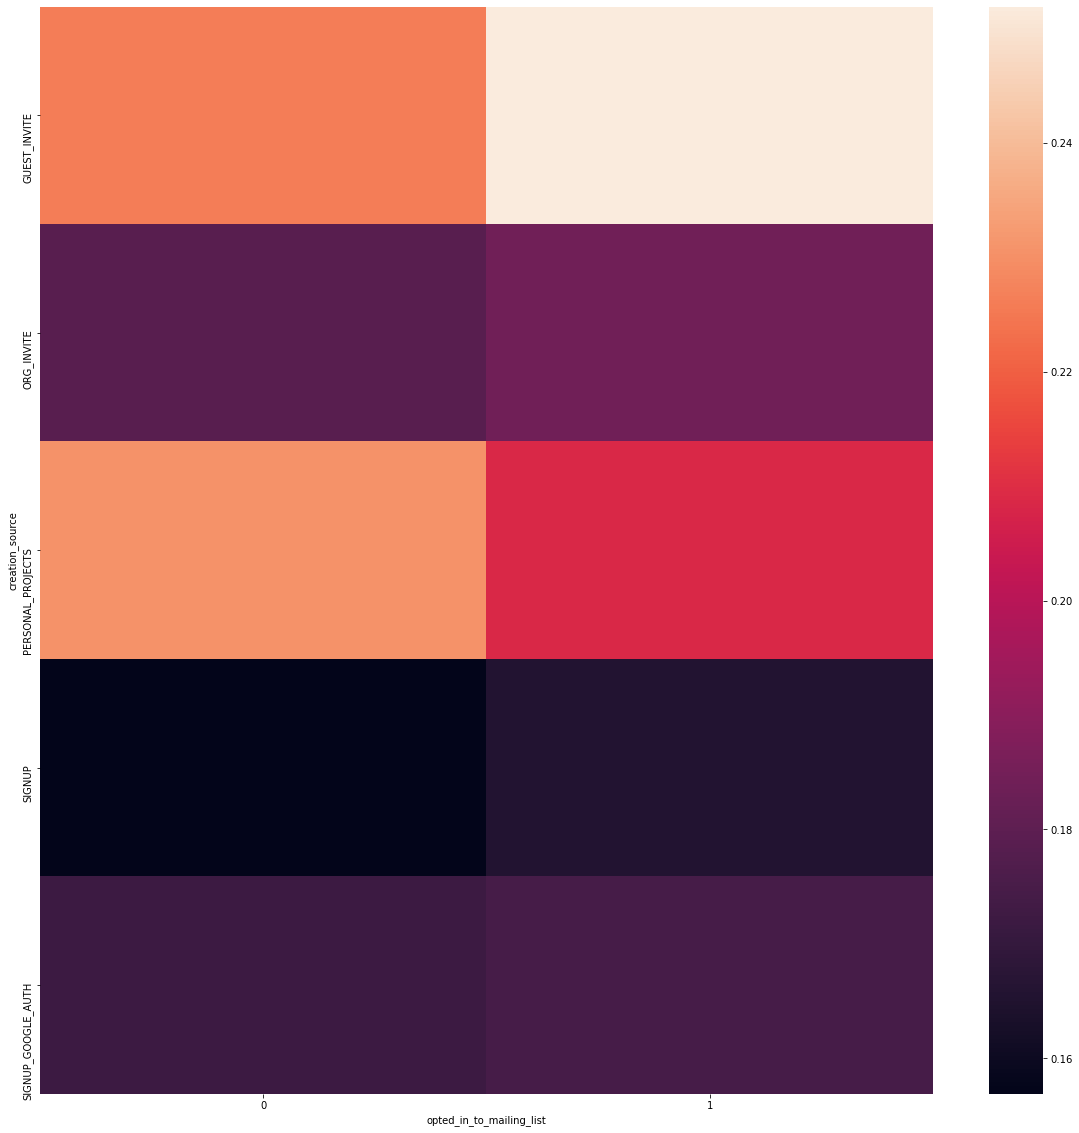

In [65]:
df_heatmap = merged_engagement.pivot_table(values='adopted_user',index='creation_source',
                                     columns='opted_in_to_mailing_list')

plt.subplots(figsize=(20,20))
sns.heatmap(df_heatmap)
plt.show()